### UQ HW #1
Chandler Zachary <br/>
MATH 6380 <br/>
Due 16 Sep 2019

#### 1.
Let $X$ and $Y$ be independent and $\mathcal{U}[0,1]$. 
* Analytically determine the *pdf* of $X+Y$, and then compute the mean and variance of $X+Y$.
* Use a normalized histogram on [0,2] with 10 bins to approximate the pdf of $X+Y$.  Do this twice with 100 and 1000 samples of $(X,Y)$.  Use the histogram to numerically compute the mean and variance, and compare with the analytical result from the first part.

#### Response

The pdf $f_Z(z)$ can be derived using the bivariate transformation method. Let $Z = X + Y$ and $W = X$. Then,<br/> 
\begin{align*} 
g_1(x, y) &= z = x + y \\ 
g_2(x, y) &= w = x, \\ 
\end{align*} 

and 
\begin{align*} 
g_1^{-1}(w, z) &= y = z - w \\ 
g_2^{-1}(w, z) &= x = w. \\ 
\end{align*}

The joint distribution of $X$ and $Y$ is given by $$f_{X, Y}(x, y) \overset{ind}{=} f_X(x)f_Y(y) = \mathcal{I}_{[0, 1]}(x)\mathcal{I}_{[0, 1]}(y).$$ Thus, the joint distribution $f_{W, Z}$ is given by $$f_{W, Z} = f_{X, Y}(g_1^{-1}(w, z), g_2^{-1}(w, z))|J| = f_X(w)f_Y(z - w)|J|.$$ 

We compute $|J|$ as: 
$$|J| = 
\begin{Vmatrix} 
\frac{\partial g_1^{-1}}{\partial w} & \frac{\partial g_1^{-1}}{\partial z} \\ 
\frac{\partial g_2^{-1}}{\partial w} & \frac{\partial g_2^{-1}}{\partial z} \\
\end{Vmatrix} = 
\begin{Vmatrix} 
-1 & 1 \\ 
1 & 0 \\
\end{Vmatrix} = \big|-1\big| = 1$$ 

Therefore, $$f_Z(z) = \int\limits_{-\infty}^{+\infty}f_X(w)f_Y(z - w)|J|dw = \int\limits_{-\infty}^{+\infty}I_{[0, 1]}(w)I_{[0, 1]}(z - w)dw.$$

Now, $z = x + y \Rightarrow 0 \leq z \leq 2$, and $w = x \Rightarrow 0 \leq w \leq 1.$ Therefore, $0 \leq z \leq 1$ when $w \leq z$, and $1 < z \leq 2$ when $z - 1 \leq w.$ Thus, $$w \leq z \Rightarrow \int\limits_{0}^{z}(1)(1)dw = w\big|_0^z = z,$$ and $$z - 1 \leq w \Rightarrow \int\limits_{z - 1}^{1}(1)(1)dw = w\big|_{z - 1}^1 = 1 - (z - 1) = 2 - z.$$ Thus, the pdf of $Z$ is: $$f_Z(z) = 
\begin{cases} 
0 & z < 0 \\ 
z & 0 \leq z \leq 1 \\ 
2 - z & 1 < z \leq 2 \\ 
1 & z > 2 \\ 
\end{cases}$$

To find $\mathbb{E}[Z]$ and $var(Z)$:
$$\begin{align*}
\mathbb{E}[Z] &\overset{def}{=} \int\limits_{-\infty}^{+\infty} zf_Z(z)dz \\
\\
&= \int\limits_{0}^{1} z^2dz + \int\limits_{1}^{2} 2z - z^2dz \\
\\
&= \frac{z^3}{3}\bigg|_0^1 + \bigg(z^2 - \frac{z^3}{3}\bigg)_1^2 = 1 \\
\end{align*}$$
<br/>
$$\begin{align*}
var(Z) &= \mathbb{E}\big(Z^2\big) - \big(\mathbb{E}(Z)\big)^2 \\
\\
\mathbb{E}[Z^2] &= \int\limits_{-\infty}^{+\infty} z^2f_Z(z)dz \\
\\
&= \int\limits_{0}^{1} z^3dz + \int\limits_{1}^{2} 2z^2 - z^3dz \\
\\
&= \frac{z^4}{4}\bigg|_0^1 + \bigg(\frac{2}{3}z^3 - \frac{1}{4}z^4\bigg)_1^2 = \frac{7}{6} \\
\\
\Rightarrow var(Z) &= \frac{7}{6} - 1 = \frac{1}{6} \\
\end{align*}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import random
random.seed(101)

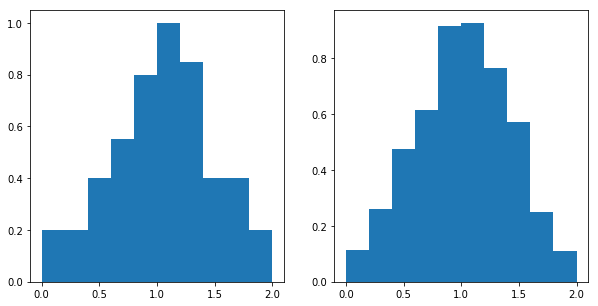

In [8]:
x1 = uniform.rvs(0, 1, 100)
y1 = uniform.rvs(0, 1, 100)
z1 = x1 + y1

x2 = uniform.rvs(0, 1, 1000)
y2 = uniform.rvs(0, 1, 1000)
z2 = x2 + y2

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5), sharex = False, sharey = False)
ax1.hist(z1, bins = 10, range = [0, 2], density = True)
ax2.hist(z2, bins = 10, range = [0, 2], density = True)
plt.show()

#### 2.

1000 bacteria are placed in twenty Petri dishes and allowed to grow(different number of bacteria per dish).  The growth rate $a$ is assumed to be *normally* distributed with unknown mean and variance,  and after 1 day, the following populations are observed:

* Analytically determine the pdf of the population at 1 day(if possible) (Hint, read about the **lognormal distribution**)

* Given the data, find the maximum likelihood estimate of the mean and variance of $a$.  You may do this numerically or mathematically.

#### Response

Let the distribution of the population in each dish after time $t$ be a random variable $X_i(t)$, with $i = 1, \dots, 20$. Then $X_i(t) = 1000e^{a_it}$, where $a_i$ is the growth rate in dish $i$, and $t$ is time in days. Now, $a_i \sim N(\mu, \sigma^2) \Rightarrow X_i \sim lognormal(\mu, \sigma^2)$, which we will show presently.

Observe that at $t = 1$, $X_i(1) = 1000e^{a_i}$, and $a_i = \text{ln}\big(\frac{X_i}{1000}\big)$. We use this fact, along with the univariate transformation, to derive the pdf for $X_i(t)$. Since $a_i \sim N(\mu, \sigma^2)$, the pdf of $a_i$ is $$f_A(a_i) = \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}\bigg(\frac{-(a_i - \mu)^2}{2\sigma^2}\bigg).$$

Define $a_i = g^{-1}(x_i) = \text{ln}\big(\frac{x_i}{1000}\big)$, as above, which is a monotone transformation, and observe that $f_A(a_i)$ is continuous for all values of $a_i \in A$, and <br/> 

$$\frac{d}{dx_i}\text{ln}\bigg(\frac{x_i}{1000}\bigg) = \frac{1}{1000x_i},$$ which is continuous for $x_i > 0$. Thus, we can write: <br/>

$$f_{X}(x_i) = f_A\big(g^{-1}(x)\big)\bigg|\frac{d}{dx_i}\big(g^{-1}(x)\big)\bigg| = \frac{1}{1000x_i\sqrt{2\pi\sigma^2}}\text{exp}\Bigg[\frac{-\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2}{2\sigma^2}\Bigg]$$

This verifies that the normal growth rate implies lognormal population growth. Since the mean and variance are the same for both distributions, we can derive the maximum likelihood estimates of the mean and variance using the joint pdf of $X_i$.

Making use of the likelihood function, the joint pdf of $X_i$ is: <br/>

\begin{align*}
\mathcal{L}(\mu, \sigma^2 | x_1, x_2, \dots, x_{20}) &= f(x_1, x_2, \dots, x_{20} | \mu, \sigma^2) \\
\\
&= \prod_{i=1}^{20}f_{X}(x_i) \\
\\
&= \prod_{i=1}^{20} \frac{1}{1000x_i\sqrt{2\pi\sigma^2}}\text{exp}\Bigg[\frac{-\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2}{2\sigma^2}\Bigg] \\
\\
\Rightarrow \text{ln}\big(\mathcal{L}(\mu, \sigma^2 | x_1, x_2, \dots, x_{20})\big) &= \text{ln}f(x_1, x_2, \dots, x_{20} | \mu, \sigma^2) \\
\\
&= \text{ln}\Bigg(\prod_{i=1}^{20} \frac{1}{1000x_i\sqrt{2\pi\sigma^2}}\text{exp}\Bigg[\frac{-\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2}{2\sigma^2}\Bigg]\Bigg) \\
\\
&\overset{ind}{=} \sum\limits_{i=1}^{20}\text{ln}\Bigg(\frac{1}{1000x_i\sqrt{2\pi\sigma^2}}\text{exp}\Bigg[\frac{-\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2}{2\sigma^2}\Bigg]\Bigg) \\
\\
&= \sum\limits_{i=1}^{20} \Bigg[\text{ln}(1) - \text{ln}(1000) - \text{ln}(x_i) - \text{ln}\sqrt{2\pi} - \text{ln}\sqrt{\sigma^2} - \bigg(\frac{\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2}{2\sigma^2}\bigg)\Bigg] \\
\\
&= \sum\limits_{i=1}^{20} \Bigg[\text{ln}(1) - \text{ln}(1000) - \text{ln}(x_i) - \frac{1}{2}\text{ln}(2\pi) - \frac{1}{2}\text{ln}\sigma^2 - \bigg(\frac{\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2}{2\sigma^2}\bigg)\Bigg] \\
\\
&= 0 - 20\text{ln}(1000) - 10\text{ln}(2\pi) - 10\text{ln}\sigma^2 - \sum\limits_{i=1}^{20}\text{ln}(x_i) - \sum\limits_{i=1}^{20}\frac{\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2}{2\sigma^2} \\
\\
&= - 20\text{ln}(1000) - 10\text{ln}(2\pi) - 10\text{ln}\sigma^2 - \sum\limits_{i=1}^{20}\text{ln}(x_i) - \sum\limits_{i=1}^{20}\frac{\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2}{2\sigma^2} \\
\\
\end{align*}

Next, we take the first partial derviatives of this log-likelihood function with respect to $\mu$ and $\sigma^2$, then set them equal to zero to arrive at the first order conditions:

\begin{align*}
\frac{\partial\text{ln}\mathcal{L}}{\partial \mu} &= \frac{1}{2\sigma^2}\sum\limits_{i=1}^{20} -2\big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big) \\
\\
&= \frac{-1}{\sigma^2}\sum\limits_{i=1}^{20} \big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big) \\
\\
&= \frac{-1}{\sigma^2}\Bigg(\sum\limits_{i=1}^{20} \text{ln}\big(\frac{x_i}{1000}\big) - 20\mu\Bigg) \\
\\
&= \frac{1}{\sigma^2}\Bigg(20\mu - \sum\limits_{i=1}^{20} \text{ln}\big(\frac{x_i}{1000}\big)\Bigg) \\
\\
\overset{FOC}{\Rightarrow} \frac{\partial\text{ln}\mathcal{L}}{\partial \mu} \overset{set}{=} 0 &\Rightarrow \frac{1}{\sigma^2}\Bigg(20\mu - \sum\limits_{i=1}^{20} \text{ln}\big(\frac{x_i}{1000}\big)\Bigg) = 0 \\
\\
&\Leftrightarrow 20\mu - \sum\limits_{i=1}^{20} \text{ln}\big(\frac{x_i}{1000}\big) = 0 \\
\\
&\Leftrightarrow 20\mu = \sum\limits_{i=1}^{20} \text{ln}\big(\frac{x_i}{1000}\big) \\
\\
&\Leftrightarrow \hat{\mu}_{MLE} = \frac{1}{20} \sum\limits_{i=1}^{20} \text{ln}\big(\frac{x_i}{1000}\big) \\
\\
\frac{\partial\text{ln}\mathcal{L}}{\partial \sigma^2} &= \frac{-10}{\sigma^2} + \frac{1}{2\big(\sigma^2\big)^2}\sum\limits_{i=1}^{20} \big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2 \\
\\
\overset{FOC}{\Rightarrow} \frac{\partial\text{ln}\mathcal{L}}{\partial \sigma^2} \overset{set}{=} 0 &\Rightarrow \frac{-10}{\sigma^2} + \frac{1}{2\big(\sigma^2\big)^2}\sum\limits_{i=1}^{20} \big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2 = 0 \\
\\
&\Leftrightarrow \frac{-10}{\sigma^2} = -\frac{1}{2\big(\sigma^2\big)^2}\sum\limits_{i=1}^{20} \big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2 \\
\\
&\Leftrightarrow 20 = \frac{1}{\big(\sigma^2\big)}\sum\limits_{i=1}^{20} \big(\text{ln}\big(\frac{x_i}{1000}\big) - \mu\big)^2 \\
&\Leftrightarrow \hat{\sigma}^2_{MLE} = \frac{1}{20}\sum\limits_{i=1}^{20} \big(\text{ln}\big(\frac{x_i}{1000}\big) - \hat{\mu}\big)^2 \\
\end{align*}

In [1]:
import numpy as np
pop1day=np.array([2136., 2143., 1969., 1928., 2020., 2033. ,2007., 1895., 2047. ,2108., 1957. ,2077.,
 2142. ,1837., 2048., 1871., 1973., 1978., 1982., 2017.])
print(pop1day)

mu_hat = (1/20)*np.sum(np.log(pop1day/1000))
sigma_sqd_hat = (1/20)*np.sum((np.log(pop1day/1000) - mu_hat)**2)

print('Mean estimate:', mu_hat, ',', 'Variance estimate:', sigma_sqd_hat)

[2136. 2143. 1969. 1928. 2020. 2033. 2007. 1895. 2047. 2108. 1957. 2077.
 2142. 1837. 2048. 1871. 1973. 1978. 1982. 2017.]
Mean estimate: 0.6964321223178728 , Variance estimate: 0.0018181330512784606


#### 3. 
Given the same data as in Problem  #2, but the initial population in each petri dish is approximate (i.e. treat as $\mathcal{U}[900,1100]$).

* Find the joint pdf of the population at 1 day (in terms of the unknown parameters in $a$)
* Set up, but do not solve, the estimate for the mean and variance of $a$. 
* Set up, but do not solve, the probability of the population being greater than 4000 after 2 days.

#### Response

Let $X_i(0)$ be uniform[900, 1100] random variables, where $X_i(0) = x_i(0)$ is the initial population of bacteria in dish $i$, for $i = 1, \dots, 20$. Proceeding as in (2), $X_i(t) = X_i(0)e^{a_it}, \; t > 0,$ is the population at time $t$ in each dish, and $a_i = \frac{1}{t}\text{ln}\big(\frac{X_i(t)}{X_i(0)}\big)$. In this form, $X_i(t)$ is now a composed function of two random variables: $X_i(0), \; a_i$. Therefore, we must derive the joint pdf of $X_i(t)$ using the bivariate transformation method.

Let $$
\begin{align*}
g_1(x_i(0), a_i) &= x_i(t) = x_i(0)e^{a_it} \\
g_2(x_i(0), a_i) &= w = x_i(0),
\end{align*}
$$ then $$
\begin{align*}
g^{-1}_1(w, x_i(t)) &= a_i = \frac{1}{t}\text{ln}\big(\frac{x_i(t)}{w}\big) \\
g^{-1}_2(w, x_i(t)) &= x_i(0) = w
\end{align*}
$$

The joint distribution of $X(0)$ and $A$ is given by: $$f_{X(0), A}(x_i(0), a_i) = \bigg(\frac{1}{200}\mathcal{I}_{[900, 1100]}\big(x_i(0)\big)\bigg)\bigg(\frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}\bigg[\frac{-(a_i - \mu)^2}{2\sigma^2}\bigg]\bigg),$$ 
<br/>
where we make the assumption that the initial population and the growth rate are independent, and the joint distribution 
<br/>
$f_{W, Z}$ is given by $$f_{W, X(t)} = f_{X(0), A}(g_1^{-1}(w, x_i(t)), g_2^{-1}(w, x_i(t)))|J| = f_{X(0)}(w)f_A\bigg(\frac{1}{t}\text{ln}\big(\frac{x_i(t)}{w}\big)\bigg)|J|.$$

We compute $|J|$ as: 
$$|J| = 
\begin{Vmatrix} 
\frac{\partial g_1^{-1}}{\partial w} & \frac{\partial g_1^{-1}}{\partial x_i(t)} \\ 
\frac{\partial g_2^{-1}}{\partial w} & \frac{\partial g_2^{-1}}{\partial x_i(t)} \\
\end{Vmatrix} = 
\begin{Vmatrix} 
\frac{-1}{w} & \frac{1}{x_i(t)t} \\ 
1 & 0 \\
\end{Vmatrix} = \bigg|\frac{1}{x_i(t)t}\bigg| = \frac{1}{x_i(t)t}$$

Therefore, the joint pdf is 
$$
\begin{align*}
f_{X(0)}(w)f_A\bigg(\frac{1}{t}\text{ln}\big(\frac{x_i(t)}{w}\big)\bigg)|J| &= \frac{1}{200\sqrt{2\pi\sigma^2}}\text{exp}\bigg[\frac{-\big(\frac{1}{t}\text{ln}\big(\frac{x_i(t)}{x_i(0)}\big) - \mu\big)^2}{2\sigma^2}\bigg]\frac{1}{x_i(t)t} \\
\\
&= \frac{1}{200x_i(t)t\sqrt{2\pi\sigma^2}}\text{exp}\bigg[\frac{-\big(\frac{1}{t}\text{ln}\big(\frac{x_i(t)}{x_i(0)}\big) - \mu\big)^2}{2\sigma^2}\bigg] \\
\end{align*}
$$

When $t = 1$, this is $$\frac{1}{200x_i(1)\sqrt{2\pi\sigma^2}}\text{exp}\bigg[\frac{-\big(\text{ln}\big(\frac{x_i(1)}{x_i(0)}\big) - \mu\big)^2}{2\sigma^2}\bigg]$$
<br/>

To arrive at estimates of the mean and variance, set up the likelihood equation:

$$
\begin{align*}
f_{X(t)}(x_i(t)) &= \int_{900}^{1100}f_{X(t), X(0)}(x_i(t), x_i(0)) dx_i(0) \\
\\
&= \int_{900}^{1100}\frac{1}{200x_i(t)t\sqrt{2\pi\sigma^2}}\text{exp}\bigg[\frac{-\big(\frac{1}{t}\text{ln}\big(\frac{x_i(t)}{x_i(0)}\big) - \mu\big)^2}{2\sigma^2}\bigg] dx_i(0) \\
\\
\Rightarrow \mathcal{L}(\mu, \sigma^2 | x_1, x_2, \dots, x_{20}) &= \prod_{i=1}^{20}\int_{900}^{1100}\frac{1}{200x_i(t)t\sqrt{2\pi\sigma^2}}\text{exp}\bigg[\frac{-\big(\frac{1}{t}\text{ln}\big(\frac{x_i(t)}{x_i(0)}\big) - \mu\big)^2}{2\sigma^2}\bigg] dx_i(0)
\\
\end{align*}
$$

and the first order conditions can be solved to determine $(\hat{\mu}, \hat{\sigma}^2)$:
<br/>

$$\frac{\partial\mathcal{L}}{\partial\mu} = 0, \quad \frac{\partial\mathcal{L}}{\partial\sigma^2} = 0$$
<br/>

The probability of the population being greater than 4000 after 2 days is given by:

$$\mathbb{P}(X_i(2) > 4000) = \int\limits_{4000}^{\infty}\int\limits_{900}^{1100}\frac{1}{400x_i(2)\sqrt{2\pi\sigma^2}}\text{exp}\bigg[\frac{-\big(\frac{1}{2}\text{ln}\big(\frac{x_i(2)}{x_i(0)}\big) - \mu\big)^2}{2\sigma^2}\bigg]dx_i(0)dx_i(t)$$